#Object Detection

In [1]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 62.4MB 77kB/s 


In [84]:

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

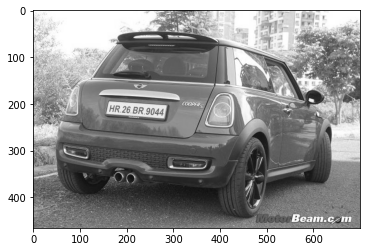

In [85]:
#read the image and convert to gray scale
img = cv2.imread('/content/drive/MyDrive/Data-Images/Data-Images/Cars/40.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

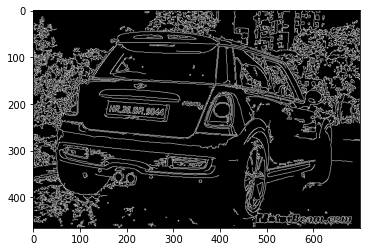

In [86]:
#edge detection
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [87]:
#contour detection

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [88]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [89]:

location

array([[[157, 221]],

       [[280, 231]],

       [[286, 202]],

       [[162, 195]]], dtype=int32)

In [90]:
#find the numberplate and darkken other parts
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

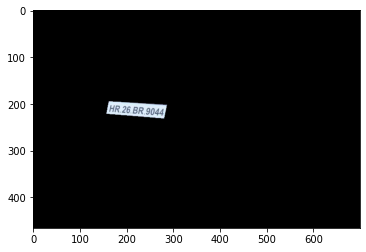

In [91]:
#Plot the cropped number plate
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [92]:

#crop and plot the numberplate image from the original image
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

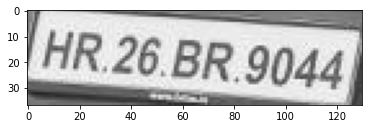

In [93]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [94]:
##easyocr function to read the text
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 4], [128, 4], [128, 34], [2, 34]],
  'HR.26.BR.9044',
  0.33859556913375854)]